#  CLIRAD CO2 B11 cosz0.5 trp75 (181126)

### Input Parameter Options

    CO2 Band 10 (1000 - 4400)
    cosz = 0.5
    rsfc = 0.0
    vstar = 1000
    nband = 340
    nv = 10000
    dv = 0.001
    ng = 10 
    nref = 2
    p_refs = / 1, 10 /
    t_refs = / 250, 250 /
    ng_refs = / 5, 5 /  
    ng_adju = / 0, 0 /
    data wgt / 10*0.6 /
    option_klin = 1
    option_k_lookup = 1 <- note: interpolation with ktable, 0 no, 1 yes
    klin = 5.0e-24
    include 'trp75_new.pro'
    nl = 0
    nt = 0
    CO2 = 800. <- note: double CO2 concentration

### Note
    Work_SW_single_18-10-08.f
    CLIRAD_h2o_co2_ktable_181013r8.f
    All variables were changed real*8 type 
    
    flux_all    <- lbl, lblk, par for each ig + total + diff.
    heat_all   <- lbl, lblk, par for each ig + total + diff.

In [1]:
import numpy as np
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as display

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

path = 'cosz0.5/trp/clirad/out/'
fname = 'co2_b11_cz0.5_trp75_181126_'

### Flux

In [2]:
flx = pd.read_table(path+'new_ng10_all.flx',header=None,sep="\s+",keep_default_na=False,index_col=[0],
                    names=['hPa','LBL_g1','LBLk_g1','PAR_g1','LBL_g2','LBLk_g2','PAR_g2','LBL_g3','LBLk_g3','PAR_g3',
                           'LBL_g4','LBLk_g4','PAR_g4','LBL_g5','LBLk_g5','PAR_g5','LBL_g6','LBLk_g6','PAR_g6',
                           'LBL_g7','LBLk_g7','PAR_g7','LBL_g8','LBLk_g8','PAR_g8',
                           'LBL_g9','LBLk_g9','PAR_g9','LBL_g10','LBLk_g10','PAR_g10',
                           'LBL_tot','LBLk_tot','PAR_tot','LBLk - LBL','PAR - LBL'])

pd.concat([flx[flx.index == 0.], flx[flx.index == 1013.]])

,LBL_g1,LBLk_g1,PAR_g1,LBL_g2,LBLk_g2,PAR_g2,LBL_g3,LBLk_g3,PAR_g3,LBL_g4,LBLk_g4,PAR_g4,LBL_g5,LBLk_g5,PAR_g5,LBL_g6,LBLk_g6,PAR_g6,LBL_g7,LBLk_g7,PAR_g7,LBL_g8,LBLk_g8,PAR_g8,LBL_g9,LBLk_g9,PAR_g9,LBL_g10,LBLk_g10,PAR_g10,LBL_tot,LBLk_tot,PAR_tot,LBLk - LBL,PAR - LBL
hPa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.001554,0.001554,0.001554,0.003158,0.003158,0.003158,0.018554,0.018554,0.018554,0.045091,0.045091,0.045091,0.121688,0.121688,0.121688,0.249569,0.249569,0.249569,0.648067,0.648067,0.648067,1.453572,1.453572,1.453572,1.465116,1.465116,1.465116e+00,25.345882,25.345882,25.345881,29.35225,29.35225,29.352249,0.00000,-0.000001
1013.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000155,0.000000,0.000000,0.014384,0.000000,0.000000,0.108013,0.000000,4.000000e-08,24.307995,23.456106,23.456105,24.43055,23.45611,23.456105,-0.97444,-0.974445


In [3]:
## save flux data to excel
sav = pd.DataFrame(flx)
sav.to_csv(fname+"flux_all.csv",header=True,index=True)
fn = fname+'flux_all.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

### Figures

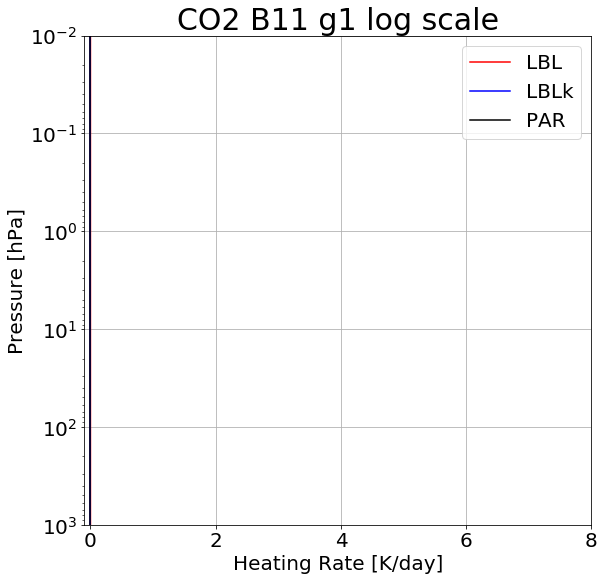

In [4]:
htr = pd.read_table(path+'new_ng10_all.htr',header=None,sep="\s+",keep_default_na=False,
                    names=['hPa','LBL_g1','LBLk_g1','PAR_g1','LBL_g2','LBLk_g2','PAR_g2','LBL_g3','LBLk_g3','PAR_g3',
                          'LBL_g4','LBLk_g4','PAR_g4','LBL_g5','LBLk_g5','PAR_g5','LBL_g6','LBLk_g6','PAR_g6',
                          'LBL_g7','LBLk_g7','PAR_g7','LBL_g8','LBLk_g8','PAR_g8',
                          'LBL_g9','LBLk_g9','PAR_g9','LBL_g10','LBLk_g10','PAR_g10',
                          'LBL_tot','LBLk_tot','PAR_tot','LBLk - LBL','PAR - LBL'])

params = {'figure.figsize': (20,9),'legend.fontsize': 20,'axes.labelsize': 20,'axes.titlesize': 30,'xtick.labelsize': 20,'ytick.labelsize': 20}
plt.rcParams.update(params)

gs = 15
ts = 35

# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g1 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g1'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g1'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

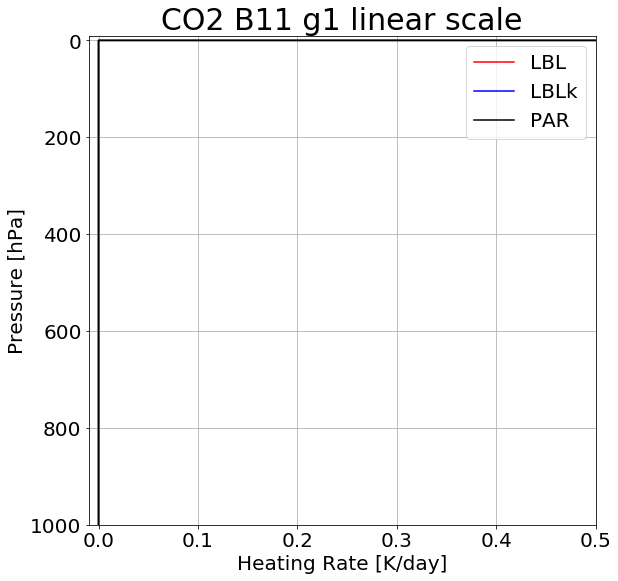

In [5]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g1 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g1'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g1'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

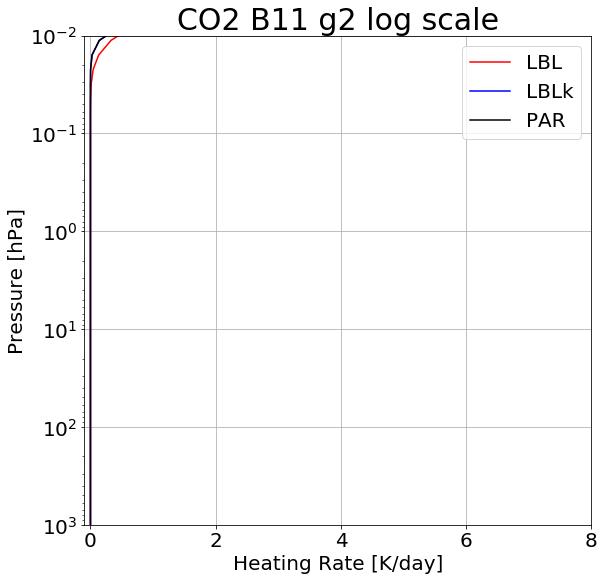

In [6]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g2 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g2'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g2'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

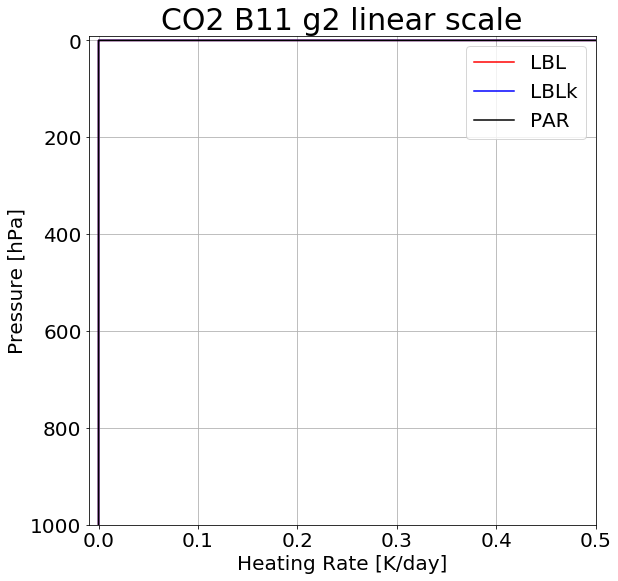

In [7]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g2 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g2'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g2'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

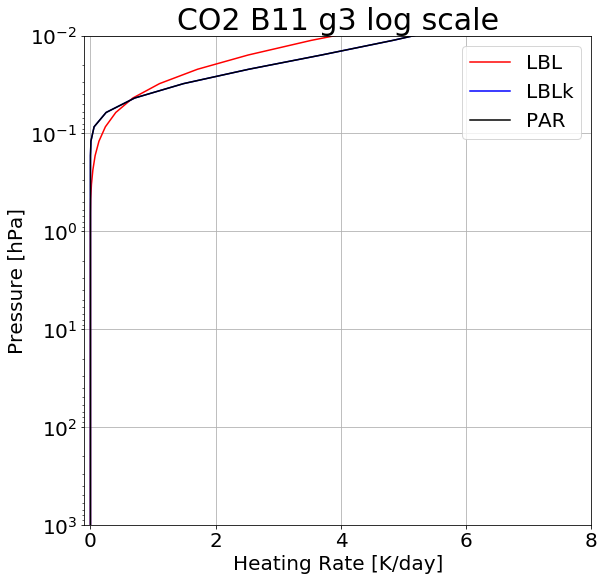

In [8]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g3 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g3'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g3'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

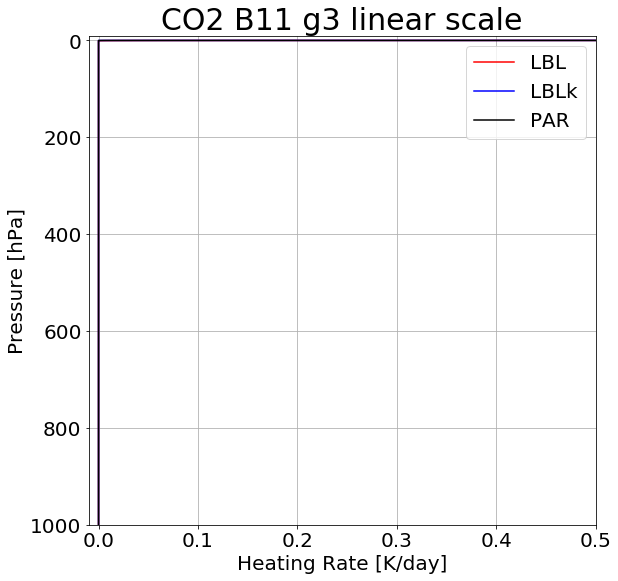

In [9]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g3 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g3'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g3'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

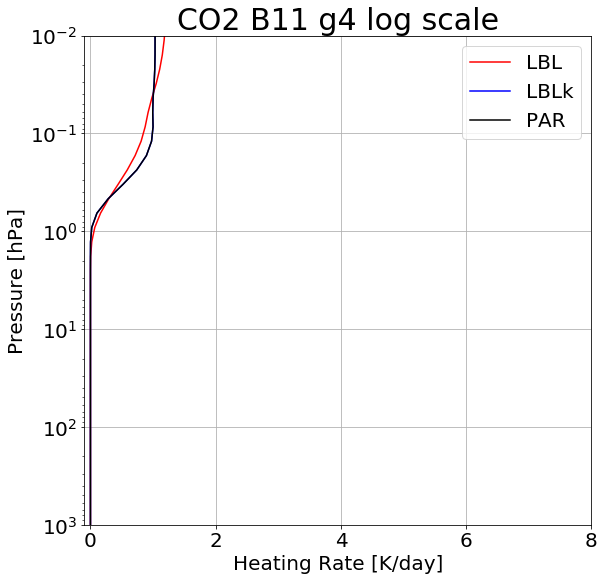

In [10]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g4 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g4'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g4'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

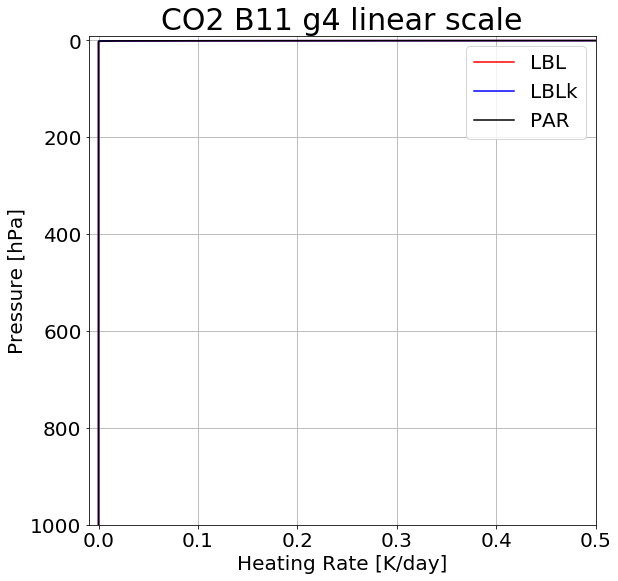

In [11]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g4 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g4'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g4'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

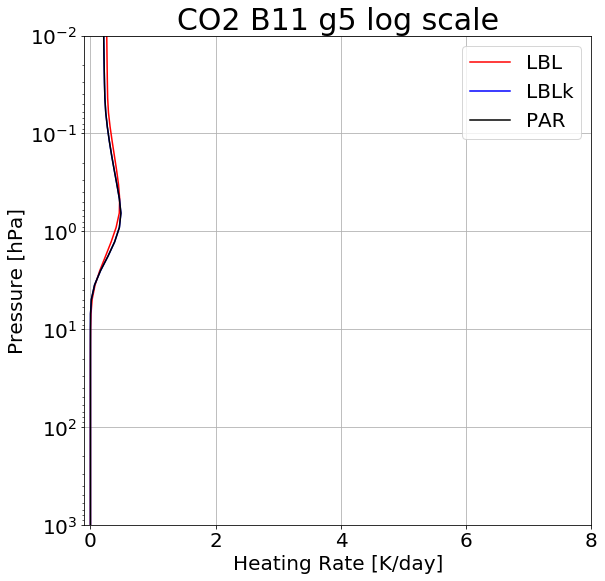

In [12]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g5 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g5'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g5'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

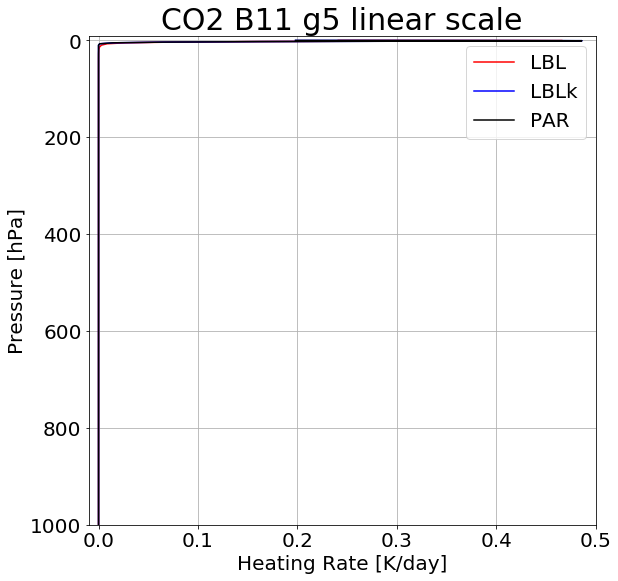

In [13]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g5 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g5'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g5'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

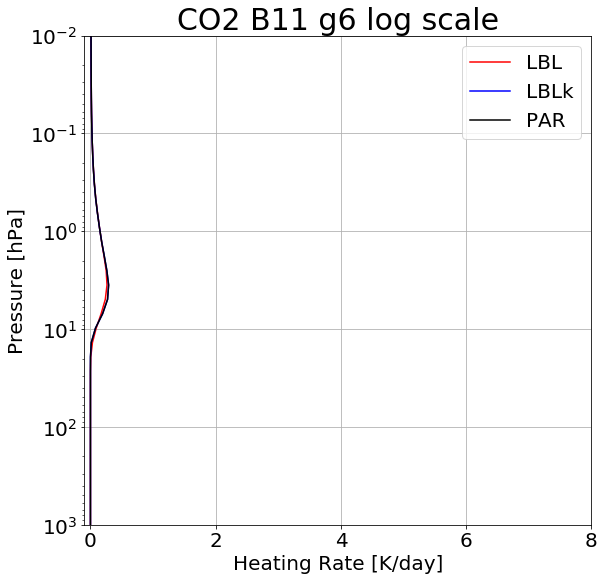

In [14]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g6 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g6'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g6'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

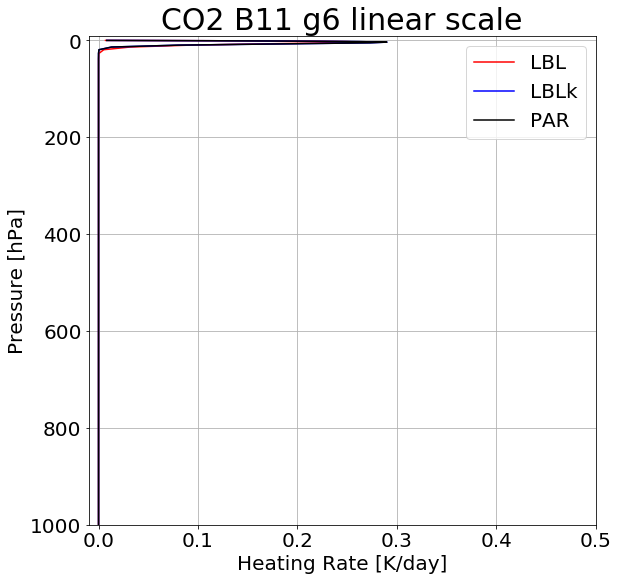

In [15]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g6 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g6'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g6'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

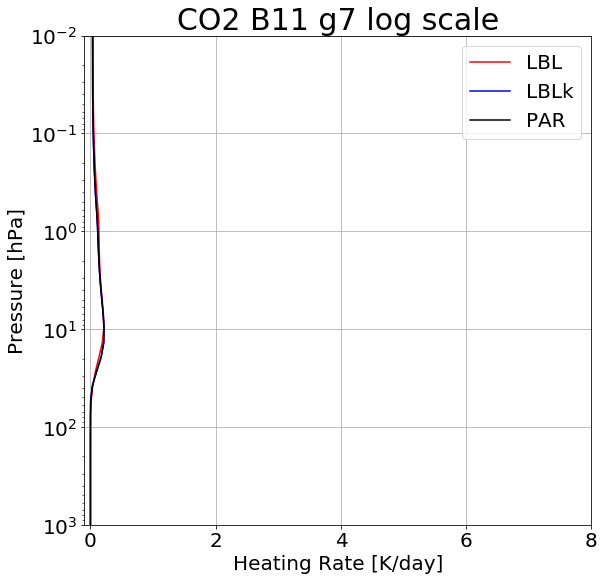

In [16]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g7 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g7'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g7'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g7'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

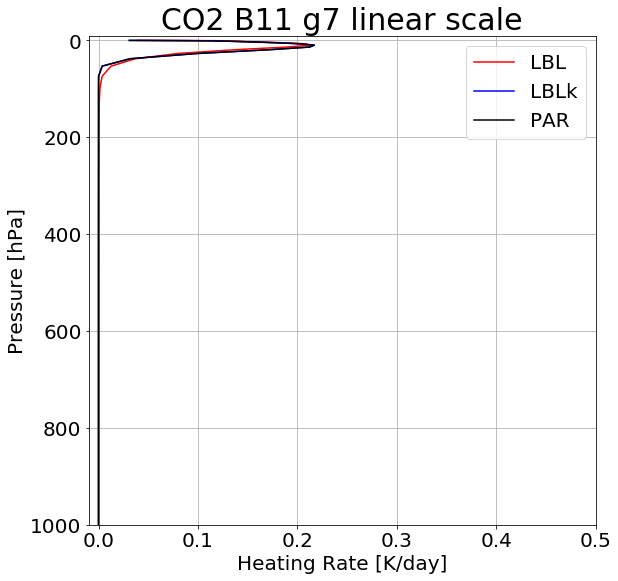

In [17]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g7 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g7'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g7'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g7'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

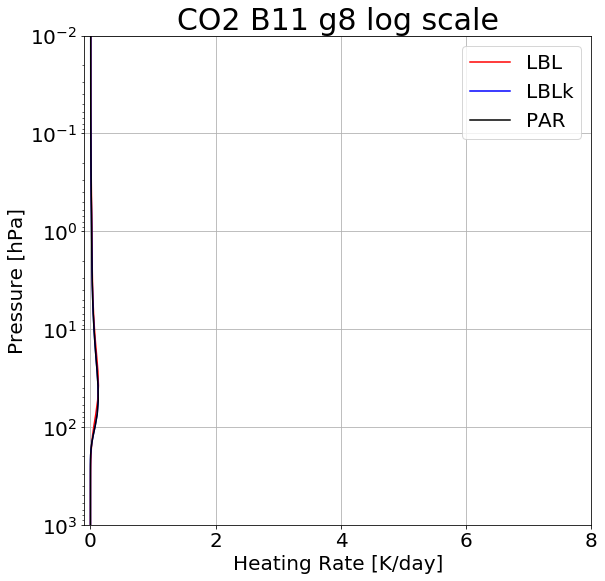

In [18]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g8 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g8'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g8'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g8'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

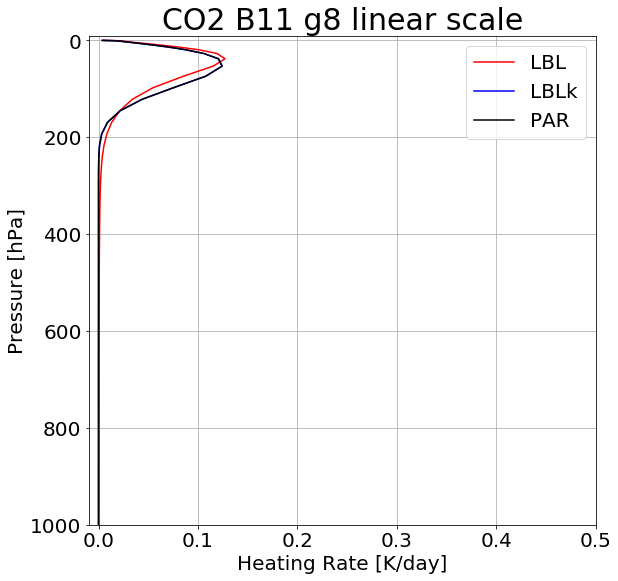

In [19]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g8 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g8'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g8'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g8'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

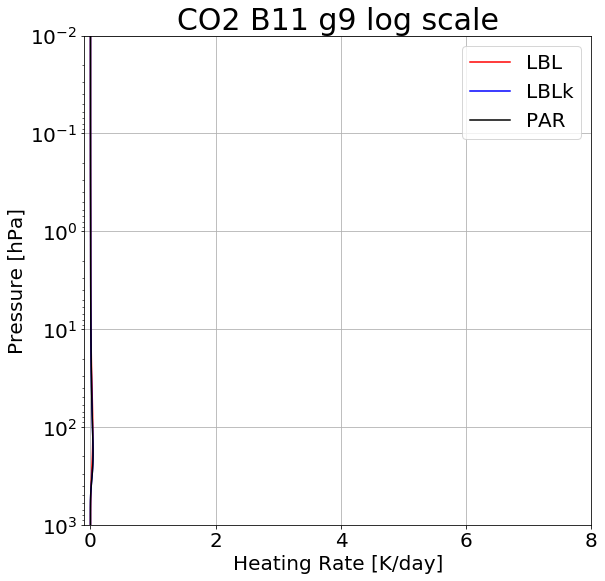

In [20]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g9 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g9'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g9'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g9'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

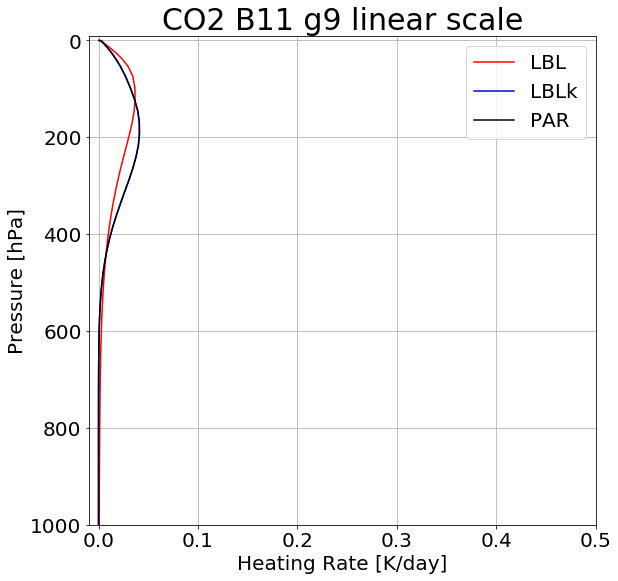

In [21]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g9 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g9'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g9'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g9'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

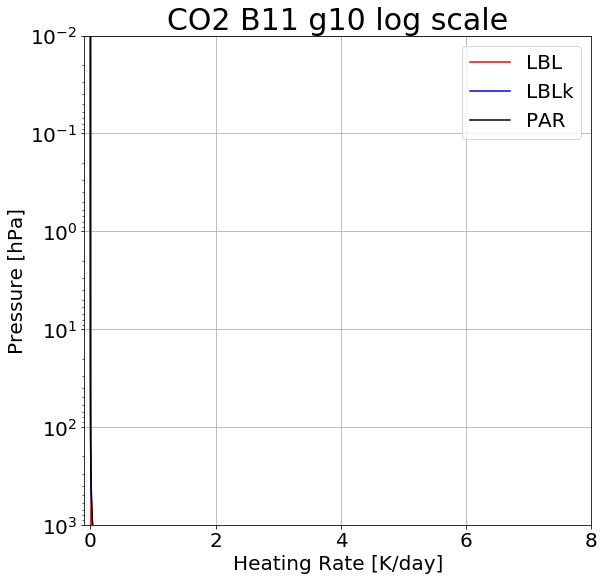

In [22]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 g10 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g10'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g10'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g10'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

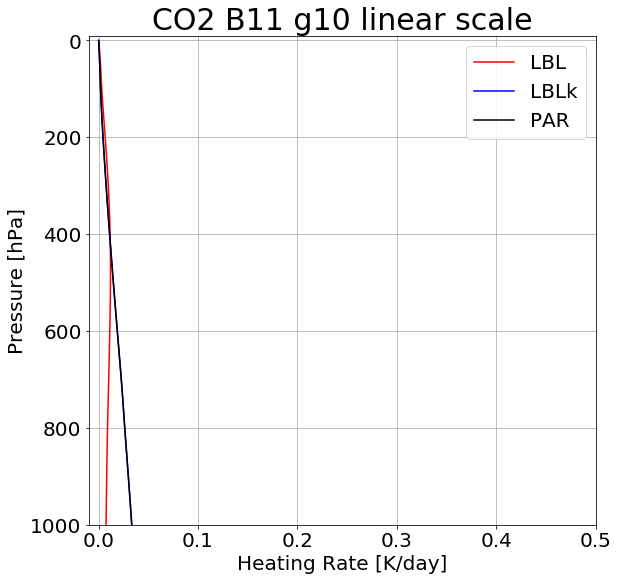

In [23]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 g10 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g10'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_g10'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_g10'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

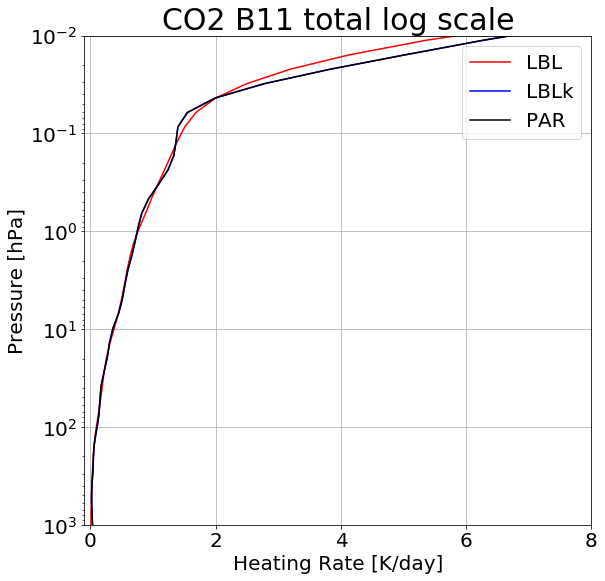

In [24]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.1,8,1000,0.01])
plt.grid()
plt.title('CO2 B11 total log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_tot'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_tot'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_tot'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

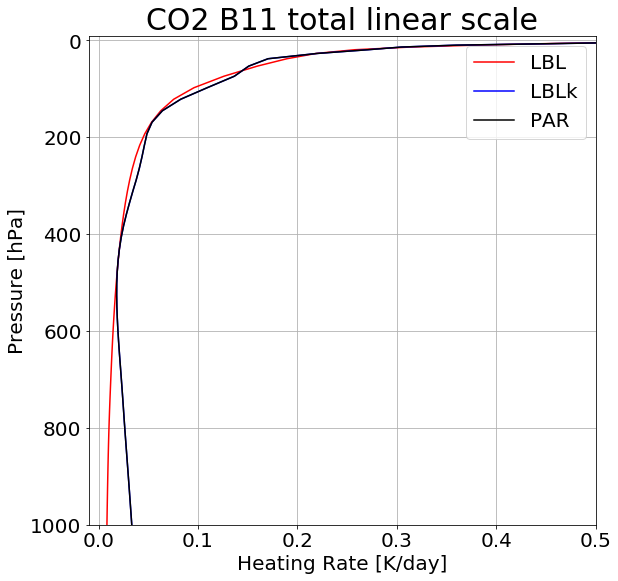

In [25]:
# linear scale
plt.subplot(1,2,2)
plt.axis([-0.01,0.5,1000,-10])
plt.grid()
plt.title('CO2 B11 total linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_tot'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLk_tot'],htr['hPa'],label='LBLk',color='blue')
plt.plot(htr['PAR_tot'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

In [26]:
## save heating rate to excel for lbl
sav = pd.DataFrame(htr)
sav.to_csv(fname+"heat_all.csv",header=True,index=False)
fn = fname+'heat_all.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

In [27]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')